In [1]:
from src.dataset import Dataset
import torch.utils.data
from torch.utils.data import SubsetRandomSampler
import matplotlib.pyplot as plt
import numpy as np
import csv
import pandas as pd
from sklearn.model_selection import StratifiedKFold
import seaborn as sns

# Einlesen Daten und ZüriCrop Fold anschauen

In [2]:
traindataset= Dataset(r"raw_data\ZueriCrop\ZueriCrop.hdf5", 0., 'test', False, 3, "labels.csv", num_channel=4, apply_cloud_masking=False,small_train_set_mode=False)
traindataloader = torch.utils.data.DataLoader(traindataset, batch_size=5595, shuffle=False, num_workers=0)

5fold:  3   Mode:  test
Dataset size:  27977
Valid dataset size:  5596
Sequence length:  71
Spatial size:  (24, 24)
Number of classes:  52
Number of classes - local-1:  6
Number of classes - local-2:  20


In [3]:
len(traindataset.valid_list)

5596

In [4]:
classes_tile = []
for i in range(5):
    traindataset= Dataset(r"raw_data\ZueriCrop\ZueriCrop.hdf5", 0., 'test', False, i+1, "labels.csv", num_channel=4, apply_cloud_masking=False,small_train_set_mode=False)
    j = len(traindataset.valid_list)
    traindataloader = torch.utils.data.DataLoader(traindataset, batch_size=j, shuffle=False, num_workers=0)

    for iteration, data in enumerate(iter(traindataloader)):
        data_j = data
        classes_tile.append(data_j[1].unique(return_counts=True))

5fold:  1   Mode:  test
Dataset size:  27977
Valid dataset size:  5595
Sequence length:  71
Spatial size:  (24, 24)
Number of classes:  52
Number of classes - local-1:  6
Number of classes - local-2:  20
5fold:  2   Mode:  test
Dataset size:  27977
Valid dataset size:  5595
Sequence length:  71
Spatial size:  (24, 24)
Number of classes:  52
Number of classes - local-1:  6
Number of classes - local-2:  20
5fold:  3   Mode:  test
Dataset size:  27977
Valid dataset size:  5596
Sequence length:  71
Spatial size:  (24, 24)
Number of classes:  52
Number of classes - local-1:  6
Number of classes - local-2:  20
5fold:  4   Mode:  test
Dataset size:  27977
Valid dataset size:  5595
Sequence length:  71
Spatial size:  (24, 24)
Number of classes:  52
Number of classes - local-1:  6
Number of classes - local-2:  20
5fold:  5   Mode:  test
Dataset size:  27977
Valid dataset size:  5596
Sequence length:  71
Spatial size:  (24, 24)
Number of classes:  52
Number of classes - local-1:  6
Number of cla

In [5]:
len(classes_tile)

5

## Anzahl Pixel pro Label pro Fold sortieren und plotten

In [6]:
all_classes = set()
for classes, _ in classes_tile:
    all_classes.update(classes.tolist())

# Fill in missing classes with 0 values
filled_data = []
for classes, values in classes_tile:
    classes_list = classes.tolist()
    values_list = values.tolist()

    missing_classes = list(all_classes - set(classes_list))
    filled_values = values_list + [0] * len(missing_classes)

    filled_data.append((classes_list + missing_classes, filled_values))

# Print the result
for classes, values in filled_data:
    print(f"Classes: {classes}, Values: {values}")

Classes: [0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 13, 14, 15, 17, 18, 19, 20, 21, 22, 26, 27, 28, 29, 30, 31, 32, 33, 34, 36, 37, 38, 39, 40, 41, 42, 44, 45, 46, 48, 49, 50, 51, 6, 11, 12, 43, 16, 23, 24], Values: [1738839, 7318, 37, 4262, 938, 156, 845, 3191, 6416, 2380, 1005, 7249, 137, 453, 651, 35, 184544, 551860, 1251, 3525, 130497, 488, 4501, 16733, 680, 5123, 1831, 7780, 12658, 1822, 66310, 675, 171, 2036, 20814, 4717, 60104, 12324, 22986, 67282, 66844, 201252, 0, 0, 0, 0, 0, 0, 0]
Classes: [0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 13, 14, 15, 17, 18, 19, 20, 21, 22, 24, 26, 27, 28, 29, 30, 31, 32, 33, 34, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 48, 49, 50, 51, 16, 12, 6, 23], Values: [1714596, 5622, 126, 7655, 627, 1427, 929, 3624, 7857, 3664, 30, 785, 7038, 157, 942, 1004, 185, 169061, 551768, 1461, 10, 4760, 118498, 642, 8189, 32826, 354, 3341, 1634, 11451, 11589, 2049, 82623, 954, 534, 2950, 21367, 1026, 2717, 50131, 23237, 17054, 62091, 62905, 221230, 0, 0, 0, 0]
Classes: [0, 1, 2, 3,

In [30]:
i=1
for classes, values in filled_data:
    print(len(classes), values, i)
    i+=1

49 [1738839, 7318, 37, 4262, 938, 156, 845, 3191, 6416, 2380, 1005, 7249, 137, 453, 651, 35, 184544, 551860, 1251, 3525, 130497, 488, 4501, 16733, 680, 5123, 1831, 7780, 12658, 1822, 66310, 675, 171, 2036, 20814, 4717, 60104, 12324, 22986, 67282, 66844, 201252, 0, 0, 0, 0, 0, 0, 0] 1
49 [1714596, 5622, 126, 7655, 627, 1427, 929, 3624, 7857, 3664, 30, 785, 7038, 157, 942, 1004, 185, 169061, 551768, 1461, 10, 4760, 118498, 642, 8189, 32826, 354, 3341, 1634, 11451, 11589, 2049, 82623, 954, 534, 2950, 21367, 1026, 2717, 50131, 23237, 17054, 62091, 62905, 221230, 0, 0, 0, 0] 2
49 [1442177, 4695, 47, 2229, 902, 158, 11, 898, 2756, 7135, 3553, 65, 1, 544, 8375, 1318, 950, 1857, 929, 228878, 726021, 1019, 47, 5760, 116733, 205, 8177, 44691, 526, 1194, 1262, 7987, 14341, 948, 96899, 1425, 654, 2635, 23728, 725, 2065, 54408, 14870, 24836, 79183, 62657, 222822, 0, 0] 3
49 [1489612, 7743, 87, 2528, 992, 33, 1279, 1737, 5489, 1412, 1117, 1501, 7655, 239, 200, 347, 533, 103, 171759, 948598, 1905, 44

In [32]:
df_fold = pd.DataFrame(columns = ['classes', 'values', 'fold'])
i=1

for classes, values in filled_data:    
    df_i = pd.DataFrame({'classes': classes, 'values': values, 'fold': i})
    print(df_i.head())
    i+=1
    df_fold = pd.concat([df_fold, df_i])     

   classes   values  fold
0        0  1738839     1
1        1     7318     1
2        2       37     1
3        3     4262     1
4        4      938     1
   classes   values  fold
0        0  1714596     2
1        1     5622     2
2        2      126     2
3        3     7655     2
4        4      627     2
   classes   values  fold
0        0  1442177     3
1        1     4695     3
2        2       47     3
3        3     2229     3
4        4      902     3
   classes   values  fold
0        0  1489612     4
1        1     7743     4
2        2       87     4
3        3     2528     4
4        4      992     4
   classes   values  fold
0        0  1482464     5
1        1     7849     5
2        2      468     5
3        3     1164     5
4        4      276     5


In [80]:
df_fold['values_percentage'] = df_fold.groupby('fold')['values'].transform(lambda x: x / x.sum()*100)

In [ ]:
sorted_filled_data = []

for classes, values in filled_data:
    sorted_data = sorted(zip(classes, values), key=lambda x: x[0])
    sorted_filled_data.append(list(zip(*sorted_data)))

# Print the result
for sorted_classes, sorted_values in sorted_filled_data:
    print(f"Classes: {list(sorted_classes)}, Values: {list(sorted_values)}")

In [ ]:
# Extract classes and values from filled_data
classes, values = zip(*sorted_filled_data)

# Increase the distance between groups
bar_width = 0.1  # Adjust this value to increase or decrease the distance

label_distance = 20


index = np.arange(len(classes[0]))

fig, ax = plt.subplots(figsize=(20,8))

for i, (class_values, label) in enumerate(zip(values, ['Fold1', 'Fold2', 'Fold3', 'Fold4', 'Fold5'])):
    ax.bar(index + i * (bar_width ) + np.arange(len(class_values)) * bar_width, class_values, bar_width, label=label)

# Add labels, title, and legend
ax.set_xlabel('Classes')
ax.set_ylabel('Values')
ax.set_title('Label distribution of the 5 folds ZüriCrop')
ax.set_xticks(index + (len(values) - 1) *(bar_width+0.9))
ax.set_xticklabels(classes[0], rotation=45, ha='right')
ax.legend()
ax.set_ylim(0, 100000)
plt.show()

In [ ]:
# Extract classes and values from filled_data
classes, values = zip(*sorted_filled_data)

# Increase the distance between groups
bar_width = 0.1  # Adjust this value to increase or decrease the distance

label_distance = 20


index = np.arange(len(classes[0]))

fig, ax = plt.subplots(figsize=(20,8))

for i, (class_values, label) in enumerate(zip(values, ['Fold1', 'Fold2', 'Fold3', 'Fold4', 'Fold5'])):
    ax.bar(index + i * (bar_width ) + np.arange(len(class_values)) * bar_width, class_values, bar_width, label=label)

# Add labels, title, and legend
ax.set_xlabel('Classes')
ax.set_ylabel('Values')
ax.set_title('Label distribution of the 5 folds ZüriCrop')
ax.set_xticks(index + (len(values) - 1) *(bar_width+0.9))
ax.set_xticklabels(classes[0], rotation=45, ha='right')
ax.legend()
#ax.set_ylim(0, 100000)
plt.show()

In [74]:
df_wide = df_fold.pivot(values = ['values'], columns = ['classes'], index = ['fold']) 
df_wide.columns = df_wide.columns.get_level_values(1)
df_wide.head()


classes,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,48,49,50,51
fold,,,,,,,,,,,,,,,,,,,,,
1,1738839,7318,37,4262,938,156,0,845,3191,6416,...,2036,20814,0,4717,60104,12324,22986,67282,66844,201252
2,1714596,5622,126,7655,627,1427,0,929,3624,7857,...,2950,21367,1026,2717,50131,23237,17054,62091,62905,221230
3,1442177,4695,47,2229,902,158,11,898,2756,7135,...,2635,23728,725,2065,54408,14870,24836,79183,62657,222822
4,1489612,7743,87,2528,992,33,0,1279,1737,5489,...,902,12333,604,1059,34718,15920,19719,49060,41973,146226
5,1482464,7849,468,1164,276,0,0,1728,317,2700,...,1886,8299,0,521,28211,1978,14579,29880,30324,96829


In [81]:
df_wide_perc = df_fold.pivot(values = ['values_percentage'], columns = ['classes'], index = ['fold']) 
#df_wide_perc.columns = df_wide.columns.get_level_values(1)
df_wide_perc.head()

values_percentage                                                    \
classes                0         1         2         3         4         5    
fold                                                                          
1               53.955634  0.227075  0.001148  0.132249  0.029106  0.004841   
2               53.203381  0.174449   0.00391  0.237532  0.019456  0.044279   
3               44.742307  0.145658  0.001458  0.069153  0.027984  0.004902   
4               46.222197  0.240263    0.0027  0.078443  0.030781  0.001024   
5               45.992177  0.243509  0.014519  0.036112  0.008563       0.0   

                                                 ...                      \
classes        6         7         8         9   ...        41        42   
fold                                             ...                       
1             0.0   0.02622  0.099016  0.199086  ...  0.063176  0.645852   
2             0.0  0.028827  0.112452    0.2438  ...  0.091538  0.663011   
3        0.000341   0.02786  0.085503  0.221357  ...  0.081749  0.736141   
4             0.0  0.039687  0.053899  0.170322  ...  0.027989  0.382689   
5             0.0   0.05361  0.009835  0.083765  ...  0.058512  0.257469   

                                                                               \
classes        43        44        45        46        48        49        50   
fold                                                                            
1             0.0  0.146367  1.865008   0.38241  0.713248   2.08774  2.074149   
2        0.031836  0.084308  1.555549  0.721037   0.52918  1.926664  1.951923   
3        0.022493  0.064065  1.687962  0.461329  0.770516  2.456585   1.94388   
4        0.018742   0.03286  1.077289  0.493993  0.611874  1.522317  1.302409   
5             0.0  0.016164  0.875222  0.061366  0.452301  0.927001  0.940776   

                   
classes        51  
fold               
1        6.244787  
2        6.864698  
3        6.912862  
4        4.537347  
5        3.004037  

[5 rows x 49 columns]

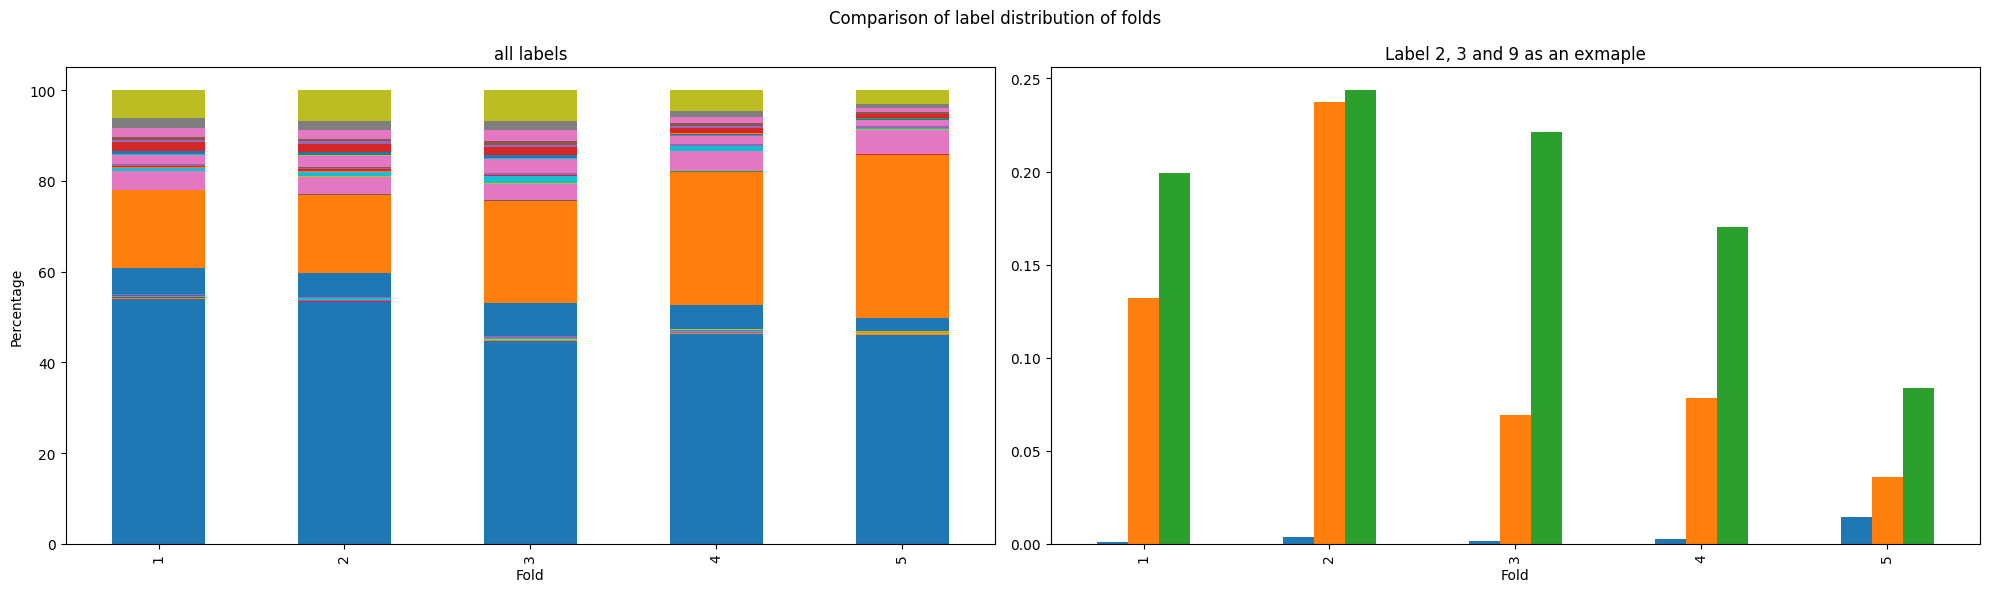

In [102]:
# Create a figure and axis (subplots)
fig, axes = plt.subplots(1, 2, figsize=(20, 6))
 
# First subplot: Dodge plot
#sns.barplot(data = df_fold, x='fold',y = 'values', hue='classes', ax=axes[0])
df_wide_perc.plot(kind='bar', stacked=True, ax=axes[0], legend=False)
 
# Set the title and labels for the first subplot
axes[0].set_title("all labels")
axes[0].set_ylabel('Percentage')
axes[0].set_xlabel('Fold')
 
# Second subplot: Fill plot
#sns.barplot(df_fold, x='classes', hue='fold', multiple='fill', ax=axes[1])
df_wide_perc.iloc[:, [2, 3, 9]].plot(kind='bar',  ax=axes[1], legend=False)
 
# Set the title and labels for the second subplot
axes[1].set_title("Label 2, 3 and 9 as an exmaple")
axes[1].set_xlabel('Fold')
 
# Adjust layout for better spacing
fig.suptitle("Comparison of label distribution of folds")
plt.tight_layout()
 
# Show the plot
plt.show()

## Erkenntnisse

Der vorliegende Fold des ZüriCrop Datensatzes ist nicht balanciert. Er zeigt grosse Unterschiede sowohl in Klassen, die sehr oft vertreten sind, aber auch in Klassen, die sehr wenig vertreten sind. Einziger Vorteil dieses Folds ist, dass er eine sehr geringe Anzahl von felder "zerschneidet" und somit der Problematik des Data leaking verringert.

Im versuch einen anderen fold zu erstellen, sind wir leider darüber gestolpert, dass die ETH ihren Datensatz um 48% verringert hat, da sie in diesen sogenannten patches von 24 x 24 pixel keine Ground TRuth hatten. Dies bezieht sich wohl insbesondere auf die Fläche des Zürichsees und grösseren Städten und Gemeinden. Nachdem sie diese entfernt haben, haben sie jeweils die ersten 20% der Indexe dem ersten Fold zugewiesen, die zweiten 20% dem zweiten Fold etc. Dadurch ist es heute nicht mehr möglich herauszufinden, an welchen Koordinaten die Grenzen der Folde liegen. Dies erschwert es uns nun einen neuen Fold zu generieren, der folgende zwei Probleme gleichzeitig verbessern kann
- Balancierte Folds
- Möglichst wenige Zerschneidungen von Feldern

Es wäre nur möglich als Vergleich, einen balancierten Fold zu generieren, der aber keinerlei Bezug mehr zur geografischen Lage hat. Das heisst wir nehmen zufällig gezogene 24 x 24px patches und nehmen sie in einen Fold, die zwar dann ausbalanciert sind, dafür jedoch data leaking aufweisen.

# Alternativen

In der Literatur wird das Problem der unbalancierten Image segmentation mit einem Gewicht der Klassen angegangen. Dies wird bereits so umgesetzt von der ETH.